<a href="https://colab.research.google.com/github/renadalahmadi/BigData-and-AI/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Image Classification Using a Neural Network**


## Import Packages 


In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
print(tf.__version__)

2.9.2


In [5]:
#Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Keras packages for neural network design
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model
from keras import regularizers

In [6]:
#Load the Fashion-MNIST Data Set
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

## Preprocessing

In [10]:
#Set a random seed for reproducibility.
np.random.seed(42)

#Reshape the data to have depth of 1.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Grayscale values run from 0 to 256.  This scales that data to a 0 to 1 range and converts to float.
#Perhaps unnecessary with Fashion MNIST, but scaling like this is best practice with image data.
#It also may improve computation efficiency.
x_train = x_train/255.
x_test = x_test/255.

#The target variable needs to be one-hot encoded, i.e.; converted into a purely categorical form.
#Leaving it as 0-9 would create false proximity relationships between the categories.
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [32]:
input_shape = x_train.shape[1:4]
input_shape

(28, 28, 1)

# Step 1: Define our network structure


In [40]:
cnn = Sequential()
# Convolutional layer
cnn.add(Conv2D(filters = 32, # How many filters you want to use
                 kernel_size = 3,  # size of each filter
                 activation='relu', # adding activation func = relu 
                 padding='same',
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)

# scaling the outputs so that they have approximately mean 0 and standard deviation 1.
# batch normalization broadly improves performance, as well as learning speed.
#It is possible to apply batch normalization to all hidden layers in a network;  
# but it's also common to apply it only to the input layer, which I have done here.
cnn.add(BatchNormalization()) 
# Dropout is a very effective regularization technique that reduces overfitting and improves generalizability when training deep neural networks.
cnn.add(Dropout(0.2))
# Pooling layer
cnn.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
cnn.add(Flatten())
# Output layer
cnn.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) 

# Step 2: Compile


Now, we compile and fit the model. The loss function here will be 'categorical cross-entropy' , and our metric is 'accuracy' score.

---

The batch size I've used here is 100, meaning that during training, backpropagation to update parameters occurs in the network after every 100 images. I've run the model for 20 epochs in this case. In other instances I trained longer, but 20 epochs is all that is required to reach the start of overfitting in this model.

In [41]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

# Step 3: Fit our model


In [42]:
history = cnn.fit(x_train, y_train,
                    validation_data = (x_test, y_test), 
                    epochs=20 , batch_size=100)

Epoch 1/20
600/600 [==============================] - 80s 131ms/step - loss: 0.3925 - acc: 0.8645 - val_loss: 0.3770 - val_acc: 0.8758
Epoch 2/20
600/600 [==============================] - 84s 139ms/step - loss: 0.2729 - acc: 0.9031 - val_loss: 0.4134 - val_acc: 0.8559
Epoch 3/20
600/600 [==============================] - 76s 127ms/step - loss: 0.2383 - acc: 0.9139 - val_loss: 0.3169 - val_acc: 0.8883
Epoch 4/20
600/600 [==============================] - 72s 120ms/step - loss: 0.2200 - acc: 0.9207 - val_loss: 0.2909 - val_acc: 0.8972
Epoch 5/20
600/600 [==============================] - 68s 114ms/step - loss: 0.2061 - acc: 0.9243 - val_loss: 0.2869 - val_acc: 0.8989
Epoch 6/20
600/600 [==============================] - 69s 115ms/step - loss: 0.1952 - acc: 0.9290 - val_loss: 0.2989 - val_acc: 0.8956
Epoch 7/20
600/600 [==============================] - 68s 113ms/step - loss: 0.1862 - acc: 0.9311 - val_loss: 0.2933 - val_acc: 0.8981
Epoch 8/20
600/600 [==============================] - 6

In [45]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 10)               

# Step 4: Visualizing the CNN Training Process



The function below plots improvement in validation accuracy over the course of training (left), and loss reduction over the course of training for both the training data and test data. 

In [43]:
def accuracy_loss_plots(model_his):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    ax1.plot(model_his.history['acc'], label='Train Accuracy')
    ax1.plot(model_his.history['val_acc'], label='Testing Accuracy')
    ax1.set_title('Test Accuracy by Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(0.8,1)
    ax1.legend();
    ax2.plot(model_his.history['loss'], label='Training loss')
    ax2.plot(model_his.history['val_loss'], label='Testing loss')
    ax2.set_title('Loss Reduction by Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(0,1)
    ax2.legend();

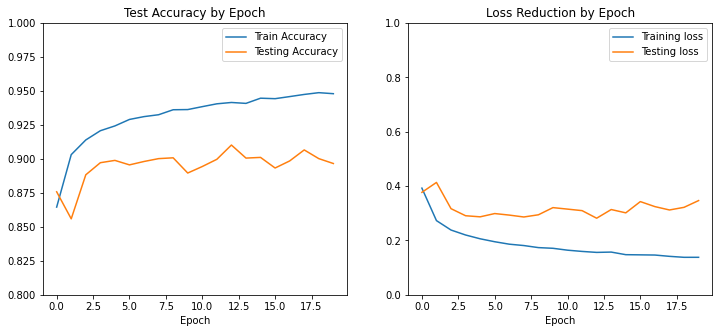

In [44]:
accuracy_loss_plots(history)

##Where Does the Model Make Mistakes?

We can generate a multi-class confusion matrix to identify where our model is error-prone, and in particular, which fashion categories the model struggles to distinguish.

313/313 [==============================] - 3s 10ms/step


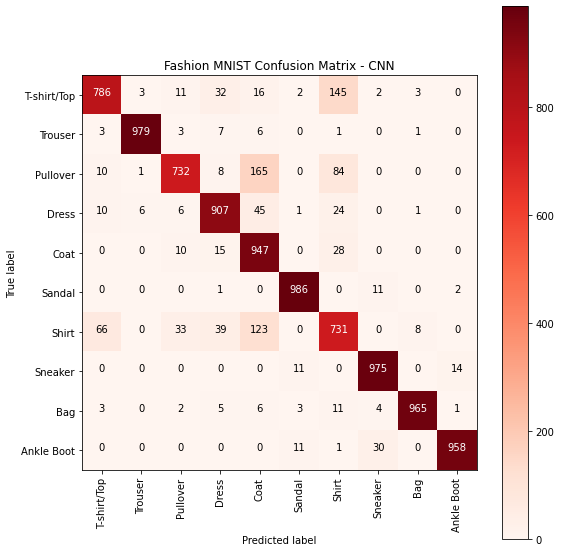

In [46]:
from sklearn.metrics import confusion_matrix
from itertools import product

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#Create Multiclass Confusion Matrix

preds = cnn.predict(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');